In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from myfunctions import *
%matplotlib inline
sns.set()

In [2]:
sales_train = pd.read_csv('../Predicting_future_sales/data/sales_train.csv')
items_df = pd.read_csv('../Predicting_future_sales/data/items.csv')
item_categories = pd.read_csv('../Predicting_future_sales/data/item_categories.csv')
shops = pd.read_csv('../Predicting_future_sales/data/shops.csv')
test = pd.read_csv('../Predicting_future_sales/data/test.csv')
sample_submission = pd.read_csv("../Predicting_future_sales/data/sample_submission.csv")
sales_train['date'] = pd.to_datetime(sales_train['date'], format='%d.%m.%Y', exact=True)
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [3]:
items_df.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [4]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [5]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [6]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [7]:
sample_submission.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [8]:
trainset = pd.merge(pd.merge(pd.merge(sales_train, items_df, how='left', on='item_id'), 
                             shops, how='left', on='shop_id'), item_categories, how='left', on='item_category_id')
trainset.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,item_category_name
0,2013-01-02,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,"Ярославль ТЦ ""Альтаир""",Кино - Blu-Ray
1,2013-01-03,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
2,2013-01-05,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
3,2013-01-06,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
4,2013-01-15,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,"Москва ТРК ""Атриум""",Музыка - CD фирменного производства


In [9]:
trainset.shape

(2935849, 10)

In [10]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 10 columns):
date                  datetime64[ns]
date_block_num        int64
shop_id               int64
item_id               int64
item_price            float64
item_cnt_day          float64
item_name             object
item_category_id      int64
shop_name             object
item_category_name    object
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 246.4+ MB


In [11]:
# Let's downcast the dataframe to save memory
trainset = downcast(trainset)
trainset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 10 columns):
date                  datetime64[ns]
date_block_num        int32
shop_id               int32
item_id               int32
item_price            float32
item_cnt_day          float32
item_name             object
item_category_id      int32
shop_name             object
item_category_name    object
dtypes: datetime64[ns](1), float32(2), int32(4), object(3)
memory usage: 179.2+ MB


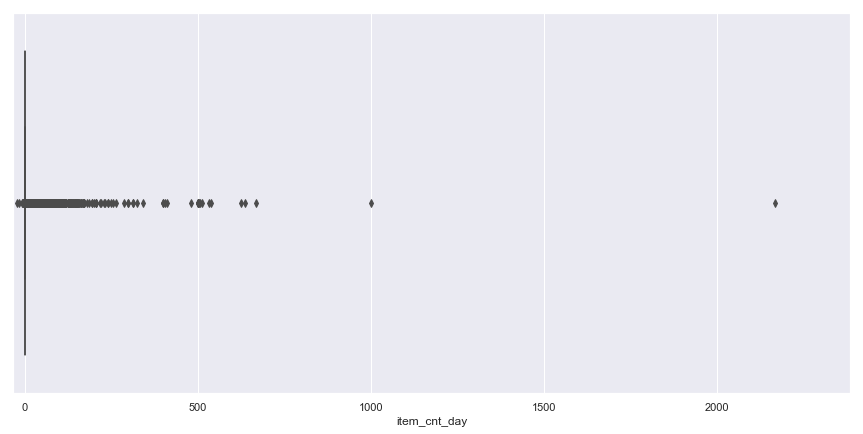

In [12]:
plt.figure(figsize=(15,7))
plt.xlim(trainset.item_cnt_day.min()*1.5, trainset.item_cnt_day.max()*1.1)
sns.boxplot(x=trainset.item_cnt_day)

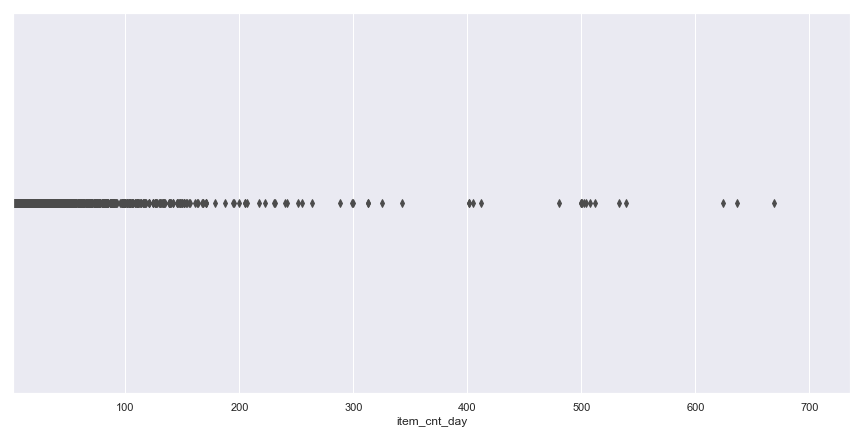

In [13]:
# Removing one data that is more than 2000 and all the data that are negative
trainset = trainset[trainset.item_cnt_day<1000]
trainset = trainset[trainset.item_cnt_day>=0]

plt.figure(figsize=(15,7))
plt.xlim(trainset.item_cnt_day.min()*1.5, trainset.item_cnt_day.max()*1.1)
sns.boxplot(x=trainset.item_cnt_day)

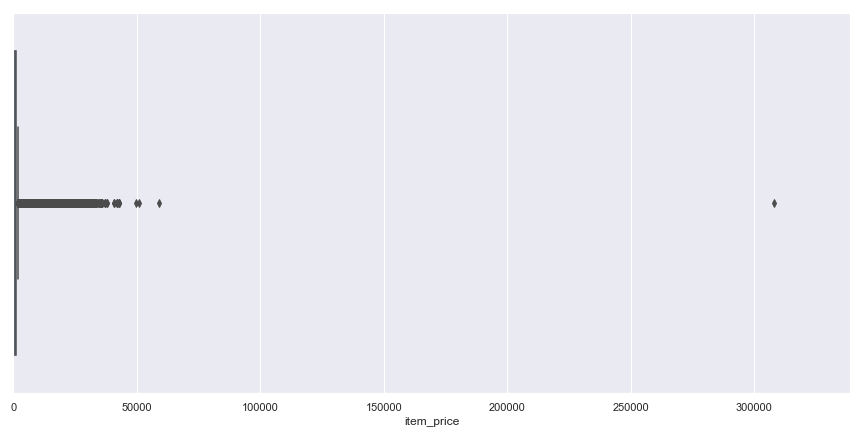

In [14]:
plt.figure(figsize=(15,7))
plt.xlim(trainset.item_price.min()*1.5, trainset.item_price.max()*1.1)
sns.boxplot(x=trainset.item_price)

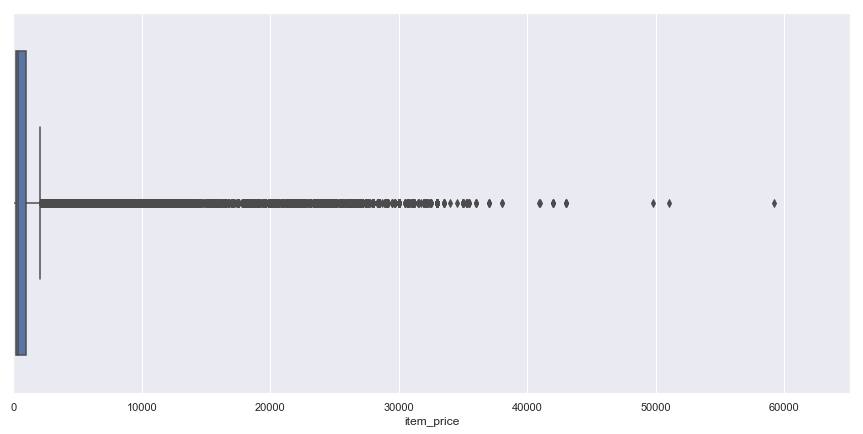

In [15]:
# Removing one data that whose price is more than 300,000 and all the price that are negative
trainset = trainset[trainset.item_price<100000]
trainset = trainset[trainset.item_price>=0]

plt.figure(figsize=(15,7))
plt.xlim(trainset.item_price.min()*1.5, trainset.item_price.max()*1.1)
sns.boxplot(x=trainset.item_price)

In [16]:
# Now format the test sets for modeling
test_shop_ids = np.sort(test['shop_id'].unique())
test_item_ids = test['item_id'].unique()
print("Shop IDs in test set:",test_shop_ids.shape)
print("Item IDs in test set:",test_item_ids.shape)
train_model = trainset[trainset['shop_id'].isin(test_shop_ids)]
print("trainset shape:", trainset.shape)
print("train_model shape:", train_model.shape)
train_model = train_model[train_model['item_id'].isin(test_item_ids)]
print("train_model shape:", train_model.shape)

Shop IDs in test set: (42,)
Item IDs in test set: (5100,)
trainset shape: (2928489, 10)
train_model shape: (2407078, 10)
train_model shape: (1221496, 10)


In [17]:
train_model.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,item_category_name
0,2013-01-02,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,"Ярославль ТЦ ""Альтаир""",Кино - Blu-Ray
10,2013-01-03,0,25,2574,399.0,2.0,DEL REY LANA Born To Die The Paradise Editio...,55,"Москва ТРК ""Атриум""",Музыка - CD локального производства
11,2013-01-05,0,25,2574,399.0,1.0,DEL REY LANA Born To Die The Paradise Editio...,55,"Москва ТРК ""Атриум""",Музыка - CD локального производства
12,2013-01-07,0,25,2574,399.0,1.0,DEL REY LANA Born To Die The Paradise Editio...,55,"Москва ТРК ""Атриум""",Музыка - CD локального производства
13,2013-01-08,0,25,2574,399.0,2.0,DEL REY LANA Born To Die The Paradise Editio...,55,"Москва ТРК ""Атриум""",Музыка - CD локального производства


In [18]:
train_model.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', 'item_name', 'item_category_id', 'shop_name',
       'item_category_name'],
      dtype='object')

In [19]:
train = train_model[['date', 'date_block_num', 'shop_id', 'item_category_id','item_id', 
                            'item_price','item_cnt_day' ]]
train.head()

,date,date_block_num,shop_id,item_category_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,37,22154,999.0,1.0
10,2013-01-03,0,25,55,2574,399.0,2.0
11,2013-01-05,0,25,55,2574,399.0,1.0
12,2013-01-07,0,25,55,2574,399.0,1.0
13,2013-01-08,0,25,55,2574,399.0,2.0


In [20]:
train = train.groupby(['date_block_num', 'shop_id', 'item_category_id', 'item_id'], 
                      as_index=False)['item_cnt_day'].sum().rename(columns={'item_cnt_day':'item_cnt_month'})

train.head()

,date_block_num,shop_id,item_category_id,item_id,item_cnt_month
0,0,2,2,5572,9.0
1,0,2,2,5643,1.0
2,0,2,5,5583,2.0
3,0,2,6,7893,3.0
4,0,2,6,7894,1.0


In [21]:
# change the order of the columns
train = train[['date_block_num', 'shop_id', 'item_id', 'item_category_id', 'item_cnt_month']]
train.head()

,date_block_num,shop_id,item_id,item_category_id,item_cnt_month
0,0,2,5572,2,9.0
1,0,2,5643,2,1.0
2,0,2,5583,5,2.0
3,0,2,7893,6,3.0
4,0,2,7894,6,1.0


In [22]:
# Let's see how many shops are there in the train_subset
shop_ids = train['shop_id'].unique()
print('Total number of shops in the training dataset:', len(shop_ids))
print('The shop_ids present in the training dataset:', shop_ids)

Total number of shops in the training dataset: 42
The shop_ids present in the training dataset: [ 2  3  4  6  7 10 12 14 15 16 18 19 21 22 24 25 26 28 31 35 37 38 41 42
 44 45 46 47 50 52 53 56 59  5 57 58 55 49 39 48 34 36]


In [23]:
# Let's see how many items are there in the train_subset
item_ids = train['item_id'].unique()
print('Total number of items in the training dataset:', len(item_ids))
print('The item_ids present in the training dataset:', item_ids)

Total number of items in the training dataset: 4716
The item_ids present in the training dataset: [ 5572  5643  5583 ...  5704 12733 15925]


In [24]:
# Now let's make a combo of date_block_num, shop_id and item_id
myList = []
for i in range(34): # the date_block_num ranges from 0 to 33
    for shop in shop_ids:
        for item in item_ids:
            myList.append([i, shop, item])
    
df = pd.DataFrame(myList, columns=['date_block_num','shop_id','item_id'])
df.head()

,date_block_num,shop_id,item_id
0,0,2,5572
1,0,2,5643
2,0,2,5583
3,0,2,7893
4,0,2,7894


In [25]:
# Now let's merge the above df with combo and our train_subset dataframes
train = pd.merge(df, train, how='left',on=['date_block_num','shop_id','item_id'])
train.fillna(0, inplace=True)
train.head()

,date_block_num,shop_id,item_id,item_category_id,item_cnt_month
0,0,2,5572,2.0,9.0
1,0,2,5643,2.0,1.0
2,0,2,5583,5.0,2.0
3,0,2,7893,6.0,3.0
4,0,2,7894,6.0,1.0


In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6734448 entries, 0 to 6734447
Data columns (total 5 columns):
date_block_num      int64
shop_id             int64
item_id             int64
item_category_id    float64
item_cnt_month      float32
dtypes: float32(1), float64(1), int64(3)
memory usage: 282.6 MB


In [27]:
# Let's downcast the dataframe to save memory
train = downcast(train)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6734448 entries, 0 to 6734447
Data columns (total 5 columns):
date_block_num      int32
shop_id             int32
item_id             int32
item_category_id    float32
item_cnt_month      float32
dtypes: float32(2), int32(3)
memory usage: 179.8 MB


In [28]:
train.head()

,date_block_num,shop_id,item_id,item_category_id,item_cnt_month
0,0,2,5572,2.0,9.0
1,0,2,5643,2.0,1.0
2,0,2,5583,5.0,2.0
3,0,2,7893,6.0,3.0
4,0,2,7894,6.0,1.0


In [29]:
# Add lag features, i.e. add data for one, two, three or more months earlier
# Here date_block_num comes handy
lag_feature_list = [1,2,3,6,12]

for lag in lag_feature_list:
    shifted_col_name = ('item_cnt_month_lag%s' % lag)
    train[shifted_col_name] = train.sort_values('date_block_num').groupby(['shop_id',
                                                'item_category_id', 'item_id'])['item_cnt_month'].shift(lag)
    train[shifted_col_name].fillna(0, inplace=True)

train.head(10).T

,0,1,2,3,4,5,6,7,8,9
date_block_num,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
shop_id,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
item_id,5572.0,5643.0,5583.0,7893.0,7894.0,7895.0,7956.0,1409.0,1467.0,3076.0
item_category_id,2.0,2.0,5.0,6.0,6.0,6.0,6.0,19.0,19.0,19.0
item_cnt_month,9.0,1.0,2.0,3.0,1.0,4.0,2.0,1.0,1.0,1.0
item_cnt_month_lag1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
item_cnt_month_lag2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
item_cnt_month_lag3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
item_cnt_month_lag6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
item_cnt_month_lag12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
train.tail(10).T

,6734438,6734439,6734440,6734441,6734442,6734443,6734444,6734445,6734446,6734447
date_block_num,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0
shop_id,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0
item_id,15499.0,1819.0,3409.0,7717.0,10204.0,9103.0,9107.0,5704.0,12733.0,15925.0
item_category_id,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
item_cnt_month,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
item_cnt_month_lag1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
item_cnt_month_lag2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
item_cnt_month_lag3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
item_cnt_month_lag6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
item_cnt_month_lag12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6734448 entries, 0 to 6734447
Data columns (total 10 columns):
date_block_num          int32
shop_id                 int32
item_id                 int32
item_category_id        float32
item_cnt_month          float32
item_cnt_month_lag1     float32
item_cnt_month_lag2     float32
item_cnt_month_lag3     float32
item_cnt_month_lag6     float32
item_cnt_month_lag12    float32
dtypes: float32(7), int32(3)
memory usage: 308.3 MB


In [32]:
train.shape

(6734448, 10)

In [33]:
# Let's remove the first 12 months from the data set as it won't add much information
train = train.query('date_block_num > 11')
train.shape

(4357584, 10)

In [35]:
# save the file so that I don't have to do all the wrangling everytime
train.to_csv('/Users/pankajacharya/Google Drive/DSC/SB/Projects/Capstone_Project01/Dropping_first_yr_with_more_val_set/wrangled_data/train.csv', index=False)

In [34]:
# I'll take months 29 through 33 for validation (
trainset = train[~train.date_block_num.isin([29,30,31,32,33])]
validationset = train[train.date_block_num.isin([29,30,31,32,33])]
trainset.head().T

,2376864,2376865,2376866,2376867,2376868
date_block_num,12.0,12.0,12.0,12.0,12.0
shop_id,2.0,2.0,2.0,2.0,2.0
item_id,5572.0,5643.0,5583.0,7893.0,7894.0
item_category_id,2.0,2.0,0.0,6.0,6.0
item_cnt_month,2.0,1.0,0.0,6.0,5.0
item_cnt_month_lag1,2.0,6.0,0.0,10.0,2.0
item_cnt_month_lag2,2.0,3.0,0.0,3.0,1.0
item_cnt_month_lag3,1.0,2.0,0.0,4.0,3.0
item_cnt_month_lag6,2.0,3.0,0.0,6.0,1.0
item_cnt_month_lag12,0.0,0.0,0.0,3.0,0.0


In [35]:
trainset.tail().T

,5744083,5744084,5744085,5744086,5744087
date_block_num,28.0,28.0,28.0,28.0,28.0
shop_id,36.0,36.0,36.0,36.0,36.0
item_id,9103.0,9107.0,5704.0,12733.0,15925.0
item_category_id,0.0,0.0,0.0,0.0,0.0
item_cnt_month,0.0,0.0,0.0,0.0,0.0
item_cnt_month_lag1,0.0,0.0,0.0,0.0,0.0
item_cnt_month_lag2,0.0,0.0,0.0,0.0,0.0
item_cnt_month_lag3,0.0,0.0,0.0,0.0,0.0
item_cnt_month_lag6,0.0,0.0,0.0,0.0,0.0
item_cnt_month_lag12,0.0,0.0,0.0,0.0,0.0


In [36]:
trainset.shape

(3367224, 10)

In [37]:
validationset.head().T

,5744088,5744089,5744090,5744091,5744092
date_block_num,29.0,29.0,29.0,29.0,29.0
shop_id,2.0,2.0,2.0,2.0,2.0
item_id,5572.0,5643.0,5583.0,7893.0,7894.0
item_category_id,0.0,0.0,0.0,6.0,6.0
item_cnt_month,0.0,0.0,0.0,4.0,1.0
item_cnt_month_lag1,0.0,0.0,0.0,2.0,2.0
item_cnt_month_lag2,0.0,0.0,0.0,1.0,1.0
item_cnt_month_lag3,0.0,0.0,0.0,4.0,5.0
item_cnt_month_lag6,0.0,0.0,0.0,3.0,6.0
item_cnt_month_lag12,0.0,0.0,0.0,4.0,2.0


In [38]:
validationset.tail().T

,6734443,6734444,6734445,6734446,6734447
date_block_num,33.0,33.0,33.0,33.0,33.0
shop_id,36.0,36.0,36.0,36.0,36.0
item_id,9103.0,9107.0,5704.0,12733.0,15925.0
item_category_id,0.0,0.0,0.0,0.0,0.0
item_cnt_month,0.0,0.0,0.0,0.0,0.0
item_cnt_month_lag1,0.0,0.0,0.0,0.0,0.0
item_cnt_month_lag2,0.0,0.0,0.0,0.0,0.0
item_cnt_month_lag3,0.0,0.0,0.0,0.0,0.0
item_cnt_month_lag6,0.0,0.0,0.0,0.0,0.0
item_cnt_month_lag12,0.0,0.0,0.0,0.0,0.0


In [39]:
validationset.shape

(990360, 10)

In [40]:
trainset.to_csv('/Users/pankajacharya/Google Drive/DSC/SB/Projects/Capstone_Project01/Dropping_first_yr_with_more_val_set/wrangled_data/trainset.csv', index=False)

In [41]:
validationset.to_csv('/Users/pankajacharya/Google Drive/DSC/SB/Projects/Capstone_Project01/Dropping_first_yr_with_more_val_set/wrangled_data/validationset.csv', index=False)

In [42]:
predictionset = train.drop_duplicates(subset=['shop_id', 'item_id'], keep='last')
predictionset.head().T

,6536376,6536377,6536378,6536379,6536380
date_block_num,33.0,33.0,33.0,33.0,33.0
shop_id,2.0,2.0,2.0,2.0,2.0
item_id,5572.0,5643.0,5583.0,7893.0,7894.0
item_category_id,0.0,0.0,0.0,0.0,6.0
item_cnt_month,0.0,0.0,0.0,0.0,4.0
item_cnt_month_lag1,0.0,0.0,0.0,0.0,1.0
item_cnt_month_lag2,0.0,0.0,0.0,0.0,1.0
item_cnt_month_lag3,0.0,0.0,0.0,0.0,2.0
item_cnt_month_lag6,0.0,0.0,0.0,0.0,2.0
item_cnt_month_lag12,0.0,0.0,0.0,0.0,2.0


In [43]:
predictionset.tail().T

,6734443,6734444,6734445,6734446,6734447
date_block_num,33.0,33.0,33.0,33.0,33.0
shop_id,36.0,36.0,36.0,36.0,36.0
item_id,9103.0,9107.0,5704.0,12733.0,15925.0
item_category_id,0.0,0.0,0.0,0.0,0.0
item_cnt_month,0.0,0.0,0.0,0.0,0.0
item_cnt_month_lag1,0.0,0.0,0.0,0.0,0.0
item_cnt_month_lag2,0.0,0.0,0.0,0.0,0.0
item_cnt_month_lag3,0.0,0.0,0.0,0.0,0.0
item_cnt_month_lag6,0.0,0.0,0.0,0.0,0.0
item_cnt_month_lag12,0.0,0.0,0.0,0.0,0.0


In [44]:
predictionset.shape

(198072, 10)

In [45]:
# now let's bring out real test set
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [46]:
final_test = pd.merge(test, predictionset, on=['shop_id', 'item_id'], how='left')
final_test.head().T

,0,1,2,3,4
ID,0.0,1.0,2.0,3.0,4.0
shop_id,5.0,5.0,5.0,5.0,5.0
item_id,5037.0,5320.0,5233.0,5232.0,5268.0
date_block_num,33.0,NaN,33.0,33.0,NaN
item_category_id,0.0,NaN,19.0,0.0,NaN
item_cnt_month,0.0,NaN,1.0,0.0,NaN
item_cnt_month_lag1,0.0,NaN,3.0,0.0,NaN
item_cnt_month_lag2,0.0,NaN,1.0,0.0,NaN
item_cnt_month_lag3,0.0,NaN,2.0,0.0,NaN
item_cnt_month_lag6,0.0,NaN,0.0,0.0,NaN


In [47]:
# Remember we are given date_block_num from 0 through 33 and we have to predict for 34
final_test['date_block_num'] = 34
final_test.head().T

,0,1,2,3,4
ID,0.0,1.0,2.0,3.0,4.0
shop_id,5.0,5.0,5.0,5.0,5.0
item_id,5037.0,5320.0,5233.0,5232.0,5268.0
date_block_num,34.0,34.0,34.0,34.0,34.0
item_category_id,0.0,NaN,19.0,0.0,NaN
item_cnt_month,0.0,NaN,1.0,0.0,NaN
item_cnt_month_lag1,0.0,NaN,3.0,0.0,NaN
item_cnt_month_lag2,0.0,NaN,1.0,0.0,NaN
item_cnt_month_lag3,0.0,NaN,2.0,0.0,NaN
item_cnt_month_lag6,0.0,NaN,0.0,0.0,NaN


In [48]:
final_test.fillna(final_test.median(), inplace=True)
final_test.head().T

,0,1,2,3,4
ID,0.0,1.0,2.0,3.0,4.0
shop_id,5.0,5.0,5.0,5.0,5.0
item_id,5037.0,5320.0,5233.0,5232.0,5268.0
date_block_num,34.0,34.0,34.0,34.0,34.0
item_category_id,0.0,0.0,19.0,0.0,0.0
item_cnt_month,0.0,0.0,1.0,0.0,0.0
item_cnt_month_lag1,0.0,0.0,3.0,0.0,0.0
item_cnt_month_lag2,0.0,0.0,1.0,0.0,0.0
item_cnt_month_lag3,0.0,0.0,2.0,0.0,0.0
item_cnt_month_lag6,0.0,0.0,0.0,0.0,0.0


In [49]:
final_test.tail().T

,214195,214196,214197,214198,214199
ID,214195.0,214196.0,214197.0,214198.0,214199.0
shop_id,45.0,45.0,45.0,45.0,45.0
item_id,18454.0,16188.0,15757.0,19648.0,969.0
date_block_num,34.0,34.0,34.0,34.0,34.0
item_category_id,55.0,0.0,0.0,0.0,0.0
item_cnt_month,1.0,0.0,0.0,0.0,0.0
item_cnt_month_lag1,1.0,0.0,0.0,0.0,0.0
item_cnt_month_lag2,1.0,0.0,0.0,0.0,0.0
item_cnt_month_lag3,2.0,0.0,0.0,0.0,0.0
item_cnt_month_lag6,0.0,0.0,0.0,0.0,0.0


In [50]:
final_test.shape

(214200, 11)

In [51]:
final_test.to_csv('/Users/pankajacharya/Google Drive/DSC/SB/Projects/Capstone_Project01/Dropping_first_yr_with_more_val_set/wrangled_data/testset.csv', index=False)